### 1. Importing the necessary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.image as mpimg
from ydata_profiling import ProfileReport
import glob
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src.data.make_dataset import rename_columns_in_txt_files
from src.data.eda_utils import column_analysis,dataset_analysis,column_visualization, is_target_imbalanced
from src.data.data_utils import get_feature_target, get_train_val_sets
from src.preprocessing import preprocess_data
from src.config import RAW_DATA_DIR, EXTERNAL_DATA_DIR, INTERIM_DATA_DIR

c:\Users\Administrator\Desktop\CreditRiskAnalysisProject\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2025-06-11 00:07:06.854 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: C:\Users\Administrator\Desktop\CreditRiskAnalysisProject


### 2. Collect the data

In [ ]:
Here you will be extracting the information from different sources.

In [2]:
# Converting the raw data files by renaming their columns based on a mapping from an Excel file and saving the results in interim folder

rename_columns_in_txt_files(
    txt_folder=str(RAW_DATA_DIR),
    xls_file=str(EXTERNAL_DATA_DIR / 'PAKDD2010_VariablesList.xls'),
    output_folder=str(INTERIM_DATA_DIR)
)

1 files processed and saved to 'C:\Users\Administrator\Desktop\CreditRiskAnalysisProject\data\interim'


### 3. Exploración y análisis de datos (EDA)

In [2]:
# Buscar archivos .txt
txt_files = glob.glob(os.path.join(INTERIM_DATA_DIR, "*.txt"))

# Leer y analizar cada TXT (ajusta el delimiter según corresponda)
for file in txt_files:
    try:
        df_txt = pd.read_csv(file, delimiter='\t',encoding='latin1')  # Cambia delimitador si es necesario
        dataset_analysis(df_txt, file)
    except Exception as e:
        print(f"No se pudo leer {file}: {e}")


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18740\1819737216.py:7: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_txt = pd.read_csv(file, delimiter='\t',encoding='latin1')  # Cambia delimitador si es necesario



--- EDA para C:\Users\Administrator\Desktop\CreditRiskAnalysisProject\data\interim\PAKDD2010_Modeling_Data_with_columns.txt ---

Dataset statistics

Number of variables:		54
Number of observations:		50000
Missing cells:			148983
Missing cells (%):		5.5%
Duplicate rows:			0
Duplicate rows (%):		0.0%

Variable types

Numeric:	34
Categorical:	20
Text:		0
Boolean:	0

Columnas categóricas: ['CLERK_TYPE', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE', 'RESIDENCIAL_PHONE_AREA_CODE', 'FLAG_MOBILE_PHONE', 'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE', 'PROFESSIONAL_PHONE_AREA_CODE', 'FLAG_ACSP_RECORD', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3']
Columnas numéricas: ['ID_CLIENT', 'PAYMENT_DAY', 'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'EDUCATION_LEVEL', 'NACIONALITY', 'RESIDENCE_

In [3]:
target_column='TARGET_LABEL_BAD=1'
df=df_txt

imbalanced = is_target_imbalanced(df, target_column)

Class counts:
TARGET_LABEL_BAD=1
0    36959
1    13041
Name: count, dtype: int64

Class proportions:
TARGET_LABEL_BAD=1
0    73.92%
1    26.08%
Name: proportion, dtype: object

✅ Target is balanced (no class exceeds 75%).


### 3.1 Column analysis


--- Análisis para la columna 'CLERK_TYPE' ---

Tipo de dato: object
Número de valores distintos (incluye NaN): 1
Valores nulos: 0 (0.00%)
Outliers detectados: No aplica (columna no numérica)

Correlación: No aplica (columna no numérica)

Interacción con la variable 'TARGET_LABEL_BAD=1':
TARGET_LABEL_BAD=1      0      1    All
CLERK_TYPE                             
C                   36959  13041  50000
All                 36959  13041  50000

Proporción de clase positiva (target=1) por categoría:
CLERK_TYPE
C      26.08%
All    26.08%
dtype: object

Diferencia máxima entre proporciones: 0.00%
La diferencia entre las categorías es pequeña. Esta variable probablemente tiene poco valor predictivo.

--- Visualización para la columna 'CLERK_TYPE' ---



c:\Users\Administrator\Desktop\CreditRiskAnalysisProject\src\data\eda_utils.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columna, order=order, palette='Set2')


<Figure size 1000x600 with 0 Axes>

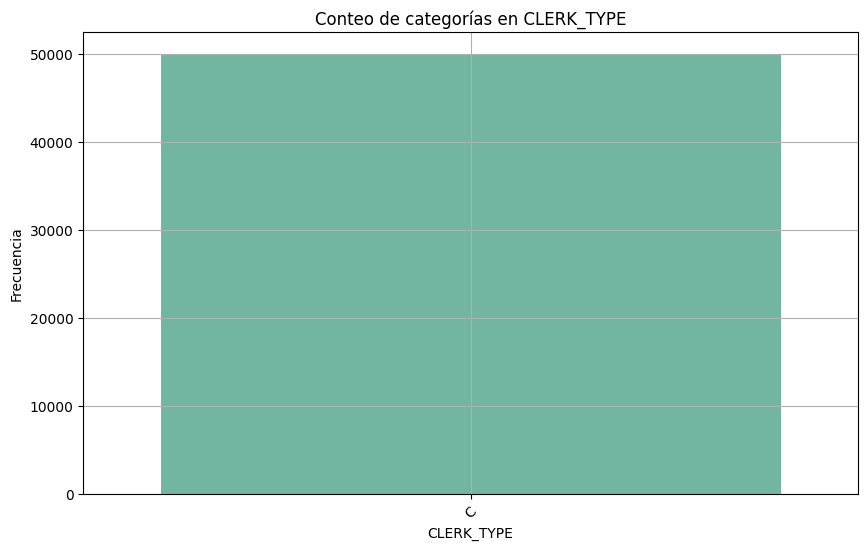

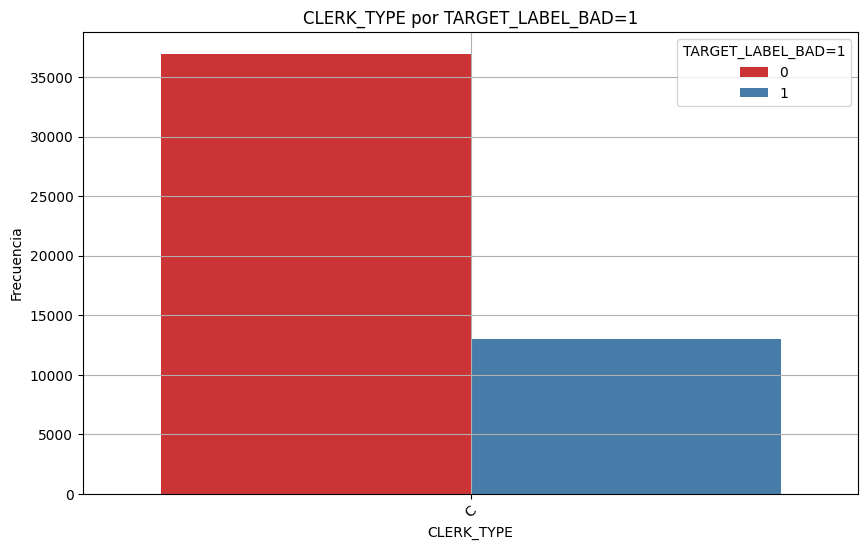

In [4]:
column= 'CLERK_TYPE'
column_analysis(df, column, target_col=target_column)
column_visualization(df, column, target_col=target_column)

### 4. Preprocessing

In [5]:
#Separate train and test dataset

x_train, y_train, x_test, y_test = get_feature_target(df, df, target_column=target_column)
print("✅ Separación realizada correctamente.")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


✅ Separación realizada correctamente.
x_train shape: (50000, 53)
y_train shape: (50000,)
x_test shape: (50000, 53)
y_test shape: (50000,)


In [6]:
x_train, x_val, y_train, y_val = get_train_val_sets(x_train,y_train) 
print("✅ División en train/val realizada correctamente.")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape:   {x_val.shape}")
print(f"y_val shape:   {y_val.shape}")

✅ División en train/val realizada correctamente.
x_train shape: (40000, 53)
y_train shape: (40000,)
x_val shape:   (10000, 53)
y_val shape:   (10000,)


In [7]:
processed = preprocess_data(x_train, x_val, x_test, y_train, y_val, y_test)

x_train_bal, y_train_bal = processed.train_data
x_val_proc, y_val = processed.val_data
x_test_proc, y_test = processed.test_data

# Si quieres los DataFrames completos con target
df_train = processed.preprocessed_dfs['train']
df_val = processed.preprocessed_dfs['val']
df_test = processed.preprocessed_dfs['test']


ℹ️  Columnas categóricas descartadas por alta cardinalidad (> 50): {'PROFESSIONAL_BOROUGH', 'PROFESSIONAL_PHONE_AREA_CODE', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_CITY', 'CITY_OF_BIRTH', 'RESIDENCIAL_CITY', 'PROFESSIONAL_ZIP_3', 'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCIAL_BOROUGH'}


In [8]:
# Accedés al DataFrame preprocesado de entrenamiento
df_train = processed.preprocessed_dfs['train']

# Llamás a tu función
is_target_imbalanced(df_train, target_col=y_train.name)

Class counts:
TARGET_LABEL_BAD=1
0    29555
1    29555
Name: count, dtype: int64

Class proportions:
TARGET_LABEL_BAD=1
0    50.00%
1    50.00%
Name: proportion, dtype: object

✅ Target is balanced (no class exceeds 75%).


False